In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv("C:/Users/prajw/Desktop/Data Projects/Home Price Prediction/Data/bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby ('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In this particular case, we are assuming that area_type, availability and society are not important factors which influence the price of the house

In [5]:
df1 = df.drop(['area_type', 'society', 'availability'], axis='columns')
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
df1[['balcony','bath']] = df1[['balcony','bath']].fillna(df1[['balcony','bath']].median())

In [8]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [9]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
df2.shape

(13303, 6)

In [11]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Since "4 Bedroom" and "4 BHK" are same and to take into account this problem, we'll be creating a new column called "bhk" which will have the integer values only

In [12]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

C:\Users\prajw\AppData\Local\Temp\ipykernel_29404\886311430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [13]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [15]:
df2 = df2.drop(['size'], axis='columns')
df2.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [16]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

We are getting some 'ranges' like '1133 - 1384'. To tackle this, we'll first see if the values in 'total_sqft' are float or not

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True    

In [18]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,3010 - 3410,2.0,2.0,192.000,4
81,Hennur Road,2957 - 3450,2.0,2.0,224.500,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
224,Devanahalli,1520 - 1740,2.0,2.0,74.820,3
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2


To make it more simpler, we'll be ignoring values which as string characters like '34.46Sq. Meter'. For the ranges like '1042 - 1105', we'll be taking the average of the two values

In [19]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
df3 = df2.copy()

In [21]:
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df3.head(10)

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
5,Whitefield,1170.0,2.0,1.0,38.00,2
6,Old Airport Road,2732.0,4.0,2.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,2.0,600.00,4
8,Marathahalli,1310.0,3.0,1.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,2.0,370.00,6


In [22]:
df3.loc[410]

location      Kengeri
total_sqft        NaN
bath              1.0
balcony           0.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [23]:
df3.groupby ('total_sqft')['total_sqft'].agg('count')

total_sqft
1.0        1
5.0        1
11.0       1
15.0       1
24.0       1
          ..
30400.0    1
35000.0    1
36000.0    1
42000.0    1
52272.0    1
Name: total_sqft, Length: 1996, dtype: int64

In [24]:
df3['total_sqft'].isna().sum()

46

In [25]:
df3 = df3.dropna()

In [26]:
df3['total_sqft'].isna().sum()

0

In [27]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [28]:
len(df4.location.unique())

1298

In [29]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               538
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           271
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [30]:
len(location_stats[location_stats<10])

1033

Here we'll be grouping all the locations with less than 10 data points to 'Other'

In [31]:
location_stats_less_than_10 = location_stats[location_stats<10]

In [32]:
location_stats_less_than_10

location
Kaverappa Layout         9
B Narayanapura           9
2nd Phase JP Nagar       9
Banagiri Nagar           9
Chandra Layout           9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Kannur                   1
whitefiled               1
Name: location, Length: 1033, dtype: int64

In [33]:
len(df4.location.unique())

1287

In [34]:
df4.location = df4.location.apply(lambda x: 'Other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

255

In [35]:
df4.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


### Outlier Removals

#### Bedroom - Sqft anomaly

In [36]:
df4[df4.total_sqft/df4.bhk<300]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Other,1020.0,6.0,2.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,2.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,Other,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,Other,1400.0,7.0,2.0,218.0,7,15571.428571
13279,Other,1200.0,5.0,2.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,3.0,70.0,5,9043.927649


Here, we are seeing that there is an anomaly of 'total_sqft' and bedroom ('bhk'). If we take the first example in the above 'df4', we can see that there is 6 bedroom in 1020 sq.ft which is not possible. To tackle this, we'll be considering a minimum threshold of "300 sq.ft" per bed room. Anything below that is unacceptable. Hence we'll be removing those records.

In [37]:
df4.shape

(13257, 7)

In [38]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12513, 7)

#### Price-Per-Squarefoot Anomaly 

In [39]:
df5.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here, we are seeing the minimum price per sqft as Rs. 267 which is unrealistic price in Bengaluru. This serves as an outlier in the data. To tackle this, we'll be grouping the data according to the location and keeping the data points which are in between (mean + one standard deviation) and (mean - one standard deviation) and deleting the rest.

In [40]:
def remove_ppsf_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [41]:
df6 = remove_ppsf_outliers(df5)
df6.shape

(10267, 7)

#### No. of Bedroom - Price Anomaly

In the dataset, we can see for some datapoints that price(2BHK) is greater than price(3BHK). This might be due to various reasons like Location of the property, special amenities provided in the propert etc... To have an overview of this, we'll be creating a scatter plot to see how many cases are there like this

In [42]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+',color = 'green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

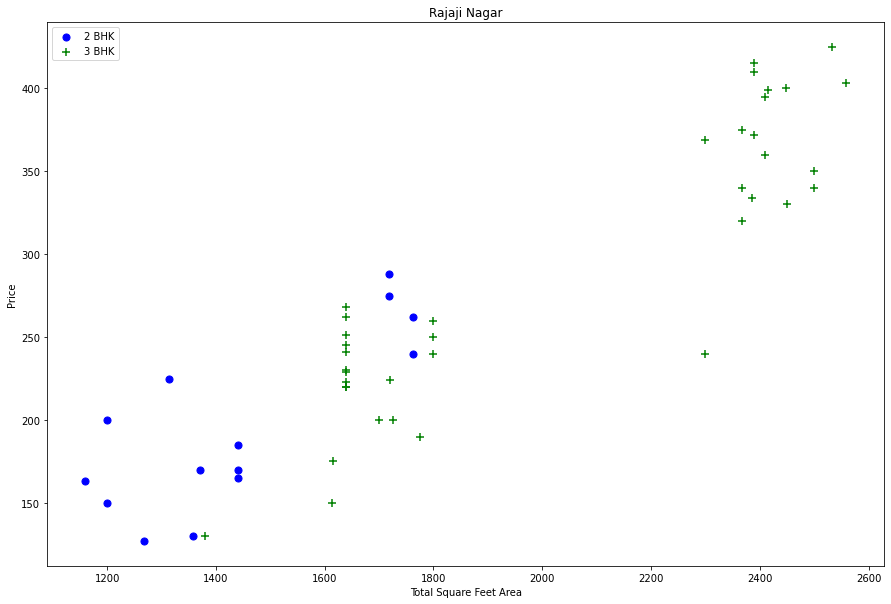

In [43]:
plot_scatter_chart(df6,'Rajaji Nagar')

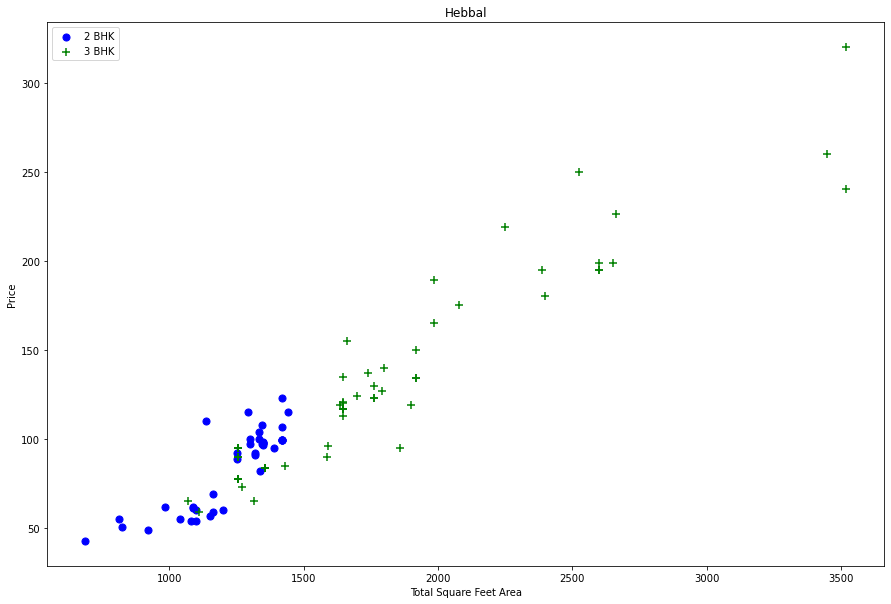

In [44]:
plot_scatter_chart(df6,'Hebbal')

In [45]:
df6.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668


In [46]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

Grouping by Location:The code groups the dataset by location, organizing properties in the same area together.

Building BHK Statistics: Within each location group, it calculates mean, standard deviation, and count of properties for each unique number of bedrooms (BHK)

Identifying Outliers:For each BHK configuration, it checks if statistics are available for one bedroom less (BHK-1) and if there are enough properties for meaningful comparison.

Exclusion of Outliers:Outliers are determined by comparing the price per square foot of properties in a BHK configuration to the mean price per square foot of properties with one bedroom less in the same location. Identified outliers are then removed from the original dataset.

In [47]:
df7 = remove_bhk_outliers(df6)
df7.shape

(7393, 7)

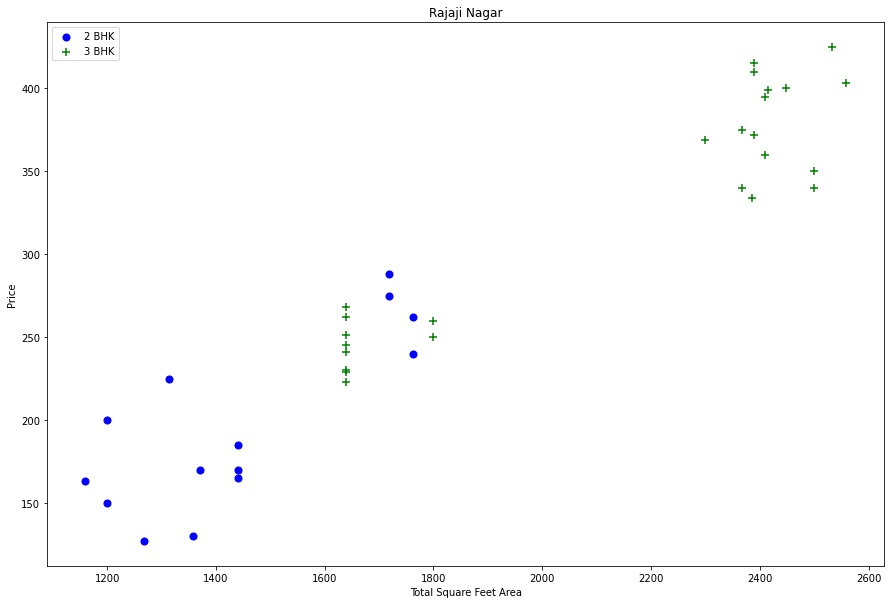

In [48]:
plot_scatter_chart(df7,'Rajaji Nagar')

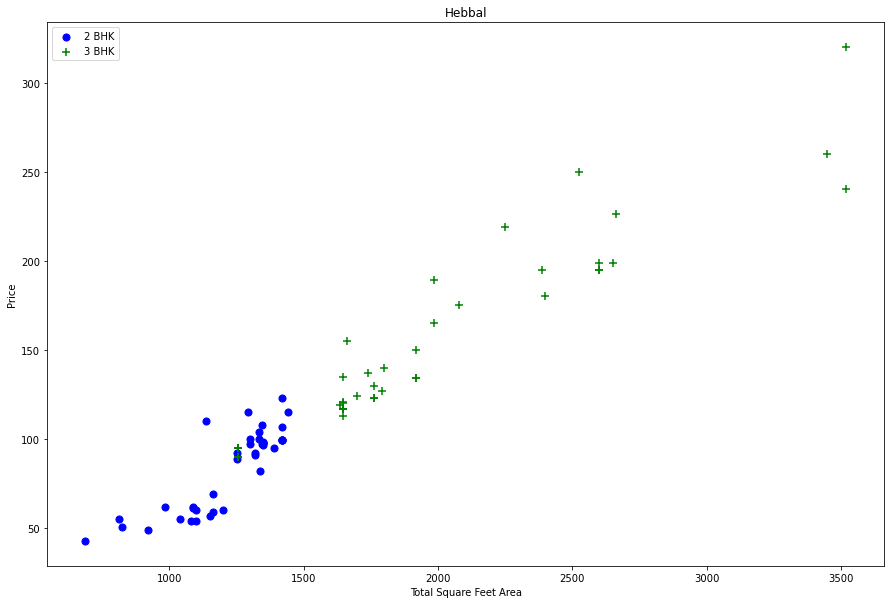

In [49]:
plot_scatter_chart(df7,'Hebbal')

### Plotting a Histogram to see the distribution of properties according to Price Per Square Feet

Text(0, 0.5, 'Count')

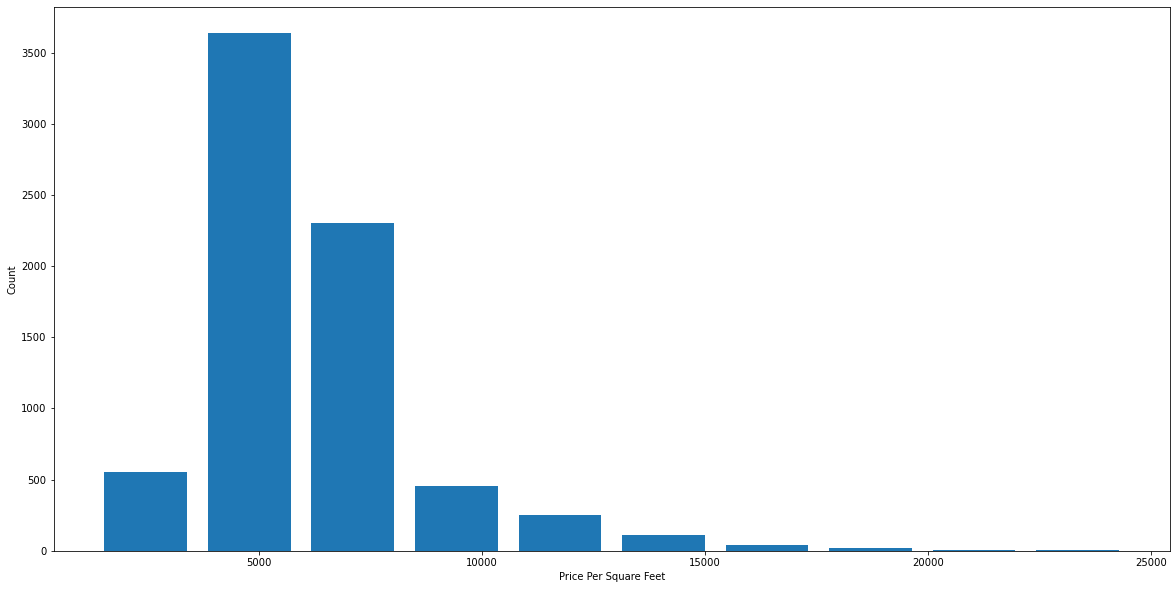

In [50]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df7.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [51]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [52]:
df7[df7.bath>10]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
585,BTM 1st Stage,3300.0,14.0,2.0,500.0,9,15151.515152
5373,Neeladri Nagar,4000.0,12.0,2.0,160.0,10,4000.000000
6001,Other,12000.0,12.0,2.0,525.0,10,4375.000000
6087,Other,10000.0,16.0,2.0,550.0,16,5500.000000
6783,Other,6000.0,12.0,2.0,150.0,11,2500.000000
7096,Other,5425.0,13.0,0.0,275.0,13,5069.124424


Here we can see that Row 585 has 3300 sq.ft but has 14 bath and 9 bhk which is unusual again. So we'll be dropping that row

In [53]:
df7 = df7.drop(585)
df7[df7.bath>10]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
5373,Neeladri Nagar,4000.0,12.0,2.0,160.0,10,4000.000000
6001,Other,12000.0,12.0,2.0,525.0,10,4375.000000
6087,Other,10000.0,16.0,2.0,550.0,16,5500.000000
6783,Other,6000.0,12.0,2.0,150.0,11,2500.000000
7096,Other,5425.0,13.0,0.0,275.0,13,5069.124424


Here, we'll be considering that anytime there are (no. of bathroom) > (no. of bedroom) + 2, we'll be dropping that records

In [54]:
df7[df7.bath>df7.bhk+2]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1650,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
5334,Nagasandra,7000.0,8.0,2.0,450.0,4,6428.571429
5930,Other,11338.0,9.0,1.0,1000.0,6,8819.897689
9031,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330


In [55]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(7315, 7)

In [56]:
df9 = df8.drop(['price_per_sqft'], axis = 'columns')
df9.head(3)

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3


### Now that the code is cleaned and all the outliers are removed, we will start with preparing a model to detect the prices

### Using One Hot Encoding

In [57]:
dummies = pd.get_dummies(df9.location)
dummies.head(3)

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df10 = pd.concat([df9,dummies.drop('Other', axis='columns')], axis='columns')
df10.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df11 = df10.drop('location', axis = 'columns')
df11.shape

(7315, 259)

In [60]:
X = df11.drop('price', axis='columns')
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
y = df11.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

### Building a Machine Learning Model

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [63]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8527800618872868

#### K-Fold Cross-Validation

In [64]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y,cv=cv)

array([0.87565356, 0.81203953, 0.84566417, 0.78980323, 0.79566836])

#### Using GridSearchCV to find the best score among different models

In [65]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
#                 Think of this as making all your measurements consistent. 
#                 If your stars are in different units, like some are in inches and others in centimeters, 
#                 "normalize" helps you convert them all to the same unit. It's like saying, "Let's all speak 
#                 the same language so our line makes sense."
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2], 
#                 Think of this as the strictness of a teacher. 
#                 The higher the alpha, the stricter the teacher is, making you simplify your answers (or model). 
#                 When alpha is 0, it’s like having no teacher at all
                'selection': ['random','cyclic']
#                 This is like choosing between studying all subjects
#                 in order (‘cyclic’) or picking a random subject to study in each study session (‘random’).
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
#                 This is like the rulebook for a game. It tells us how to measure the quality of a split in the tree. 
#                 There are different types of rulebooks (or criteria) we can use.
                'splitter': ['best','random']
#                 This is like choosing the strategy for a game. 
#                 ‘Best’ means we always make the best move, while ‘random’ means we sometimes make random moves.
                
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
    
find_best_model_using_gridsearchcv(X,y)

C:\Users\prajw\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\prajw\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make

C:\Users\prajw\Softwares\Anaconda\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\prajw\Softwares\Anaconda\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,model,best_score,best_params
0,linear_regression,0.823766,{'normalize': True}
1,lasso,0.693186,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.696685,"{'criterion': 'mse', 'splitter': 'best'}"


In [66]:
def predict_price(location, sqft, bath, balcony, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [67]:
predict_price('1st Phase JP Nagar', 1000, 2, 2, 2)

C:\Users\prajw\Softwares\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.05623157252455

In [68]:
predict_price('1st Phase JP Nagar', 1000, 2, 1, 2)

C:\Users\prajw\Softwares\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.66590894862274

In [69]:
predict_price('Indira Nagar', 1000, 3, 3, 2)

C:\Users\prajw\Softwares\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


191.73942917898714

#### Exporting the model to pickel file to be used in python flask server

In [70]:
import pickle
with open('bengaluru_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [71]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))